In [26]:
import re

import src.ArrayGen as q

$f(diag) if(line: 3x+1)$

In [27]:
def normalize(expr: str) -> str:
    expr = expr.replace('^', '**')
    expr = re.sub(r'(\d)([a-zA-Z])', r'\1*\2', expr)
    return expr

In [29]:
#normalize('3x^2+1') -> '3*x**2+1'

'3*x**2+1'

In [30]:
def parse_math_format(input_str: str):
    """
    Parses your custom math format and returns a list of keywords.
    """

    # Remove outer f(...) or plot(...)
    match = re.match(r'(f|plot)\((.*)\)', input_str.strip())
    if not match:
        return []

    content = match.group(2).strip()

    # Case 1: factorial using !
    if re.match(r'\d+!', content):
        number = content.replace("!", "").strip()
        return [number, '!']

    # Case 2: factorial using fact:
    if content.startswith("fact:"):
        number = content.split(":")[1].strip()
        return [number, '!']

    # Remove unnecessary parentheses
    content = content.strip("()")

    keywords = []

    # Split by "of" or "if" or ":"
    parts = re.split(r'\bof\b|\bif\b|:', content)

    for part in parts:
        part = part.strip()
        if not part:
            continue

        # Normalize math expressions
        if re.search(r'[0-9x^]', part):
            part = normalize(part)

        keywords.append(part)

    return keywords

In [33]:
test1: str = 'f(diag of 3x^2 + 1)'
print(parse_math_format(test1))

test2: str = 'f(fact: 5)'
print(parse_math_format(test2))

test3: str = 'f((x,y) of 3x+1)'
print(parse_math_format(test3))

['diag', '3*x**2 + 1']
['5', '!']
['x,y)', '3*x+1']


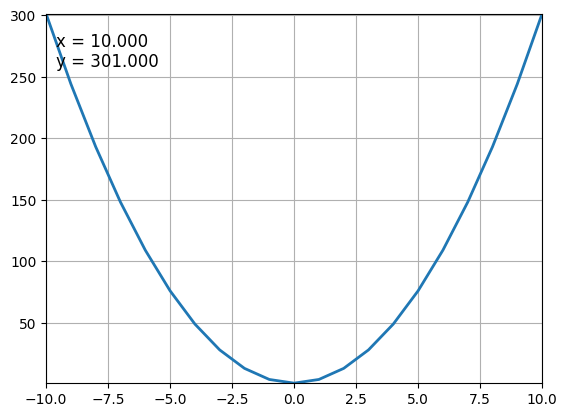

120


In [47]:
if parse_math_format(test1)[0] == 'diag':
    x, y = q.expr(parse_math_format(test1)[1], vars_='x')
    q.Graphing.plot(x, y, static=True)

if parse_math_format(test2)[0].isdigit():
    if parse_math_format(test2)[1] == '!':
        z = q.get_num(parse_math_format(test2)[0])
        z, = z
        print(q.Maths.factorial(z))

In [46]:
expr = '3'
lst = q.get_num(expr)
lst, = lst
print(lst)

3


___

In [49]:
import re
import src.ArrayGen as q

def syn(expr: str) -> None | list[int | float]:

    def normalize(expr_: str) -> str:
        expr_ = expr_.replace('^', '**')
        expr_ = re.sub(r'(\d)([a-zA-Z])', r'\1*\2', expr_)
        return expr_

    def parse_math_format(input_str: str):
        match = re.match(r'(f|plot)\((.*)\)', input_str.strip())
        if not match:
            return []

        content = match.group(2).strip()

        # Factorial using !
        if re.match(r'^\d+!$', content):
            number = content.replace("!", "").strip()
            return [number, '!']

        # Factorial using fact:
        if content.startswith("fact:"):
            number = content.split(":")[1].strip()
            return [number, '!']

        content = content.strip("()")

        keywords = []
        parts = re.split(r'\bof\b|\bif\b|:', content)

        for part in parts:
            part = part.strip()
            if not part:
                continue

            if re.search(r'[0-9a-zA-Z^]', part):
                part = normalize(part)

            keywords.append(part)

        return keywords


    # ✅ Parse ONCE
    parsed = parse_math_format(expr)

    if not parsed:
        print("Invalid syntax")
        return

    command = parsed[0]

    # =========================
    # DIAGRAM CASE
    # =========================
    if command == 'diag':
        if len(parsed) < 2:
            print("No expression provided.")
            return

        x, y = q.expr(parsed[1], vars_='x')
        q.Graphing.plot(x, y, static=True)

    # =========================
    # FACTORIAL CASE
    # =========================
    elif command.isdigit():
        if len(parsed) > 1 and parsed[1] == '!':
            z = int(command)
            print(q.Maths.factorial(z))


In [58]:
expr = 'f((x,y) of 3x^2+5x+1)' # STILL HAVE TO DO THIS!! (x,y)
syn(expr)